In [153]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
df_train = pd.read_csv('train.csv',index_col='PassengerId')
df_train
#共11个特征

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [149]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [122]:
#统计每个特征中空值的个数，年龄Age和Cabin
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [123]:
def data_preprocessing(df):
    df = df.drop(['Name','Cabin'],axis=1)#删除Nname和Cabin这两列
    df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)#对Sex进行onehot编码
    df['Age'].fillna(df['Age'].mean(),inplace=True)#将Age的空值用均值替代
    df.dropna(inplace=True)#删除带有空值的行
    embarked_encoded = pd.get_dummies(df['Embarked'])
    #对上船的地方进行onehot编码,因为Embarked有三类，C Q S，所以one-hot后会变为这三列，对应列为1
    df = pd.concat([df,embarked_encoded],axis=1)
    df = df.drop(['Embarked','S','Ticket'],axis=1)
    return df

In [124]:
df_train_processed = data_preprocessing(df_train)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    uint8  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   C         889 non-null    uint8  
 8   Q         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [125]:
df_train_processed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,0
2,1,1,0,38.000000,1,0,71.2833,1,0
3,1,3,0,26.000000,0,0,7.9250,0,0
4,1,1,0,35.000000,1,0,53.1000,0,0
5,0,3,1,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0,0
888,1,1,0,19.000000,0,0,30.0000,0,0
889,0,3,0,29.699118,1,2,23.4500,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

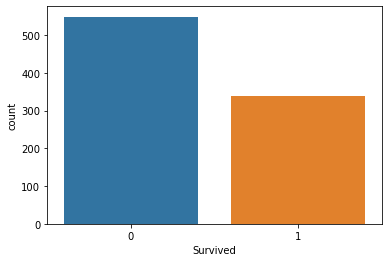

In [126]:
sns.countplot(x=df_train_processed['Survived'])

In [127]:
#将数据集划分为x和y,x为训练数据，y为标签即是否存活
X = df_train_processed.drop(['Survived'],axis=1)
y = df_train_processed['Survived']

<AxesSubplot:xlabel='Survived', ylabel='count'>

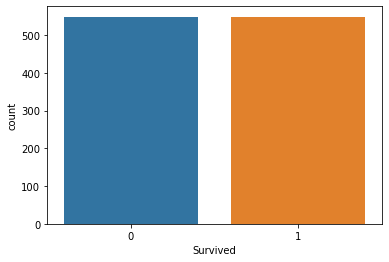

In [128]:
#观察到存活与死亡的数据人数相差200人左右，所以采用SMOTE算法增加存活人的数据量
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=17)
X_resampled , y_resampled = smote.fit_resample(X,y)
sns.countplot(x=y_resampled)

In [129]:
#采用sklearn.preprocessing包对特征数据进行归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled

array([[1.        , 1.        , 0.27117366, ..., 0.01415106, 0.        ,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.13913574, 1.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.01546857, 0.        ,
        0.        ],
       ...,
       [0.5       , 0.        , 0.2963056 , ..., 0.03405034, 0.        ,
        0.        ],
       [0.        , 0.        , 0.46933597, ..., 0.43381781, 0.        ,
        0.        ],
       [0.        , 0.        , 0.64758611, ..., 0.15235607, 0.        ,
        0.        ]])

In [130]:
#训练集中选择20%的样本作为验证集
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X_scaled,y_resampled,test_size=0.2)

In [131]:
#分类器模型的搭建
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier,'KNN':KNeighborsClassifier,'Support Vector':SVC,'Naive bayes bernoulli':BernoulliNB}
for i in models:
    clf = models[i]()
    clf.fit(X_train,y_train)
    print(i)
    print(classification_report(y_test,clf.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       115
           1       0.79      0.84      0.81       105

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       115
           1       0.84      0.82      0.83       105

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

KNN
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       115
           1       0.81      0.83      0.82       105

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83   

In [133]:
#KNN和随机森林结果更好，所以采用这两种分类模型
#先优化KNN算法的参数
from sklearn.model_selection import GridSearchCV
params = [{'n_neighbors':[1,2,3,4,5],'algorithm':['ball_tree', 'kd_tree', 'brute']}]
knn_clf = KNeighborsClassifier()
final_clf_KNN = GridSearchCV(knn_clf,params)
final_clf_KNN.fit(X_train,y_train)
print(classification_report(y_test,final_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94       115
           1       0.96      0.91      0.94       105

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220



In [134]:
#再优化随机森林算法的参数
params=[{'n_estimators':[10,50,100,150,200,250],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt','log2']}]
rf_clf = RandomForestClassifier()
final_clf_RF = GridSearchCV(rf_clf,params)
final_clf_RF.fit(X_train,y_train)
print(classification_report(y_test,final_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94       115
           1       0.96      0.91      0.94       105

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220



In [144]:
#KNN和随机森林相比，KNN的f1更好
#读取测试数据集
X_test = pd.read_csv('test.csv',index_col='PassengerId')
submission=pd.DataFrame(X_test.index)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [146]:
#对测试集进行预处理
surived=X_test['Survived']
X_test = X_test.drop(['Name','Cabin','Survived'],axis=1)
X_test['Sex'] = pd.get_dummies(X_test['Sex'],drop_first=True)
X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)
embarked_encoded = pd.get_dummies(X_test['Embarked'])
X_test = pd.concat([X_test,embarked_encoded],axis=1)
X_test_processed = X_test.drop(['Embarked','S','Ticket'],axis=1)
X_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    uint8  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [147]:
#对测试集的特征进行归一化
X_test_scaled = scaler.fit_transform(X_test_processed)
X_test_scaled

array([[1.        , 1.        , 0.4527232 , ..., 0.01528158, 0.        ,
        1.        ],
       [1.        , 0.        , 0.61756561, ..., 0.01366309, 0.        ,
        0.        ],
       [0.5       , 1.        , 0.8153765 , ..., 0.01890874, 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.50547277, ..., 0.01415106, 0.        ,
        0.        ],
       [1.        , 1.        , 0.39697468, ..., 0.01571255, 0.        ,
        0.        ],
       [1.        , 1.        , 0.39697468, ..., 0.0436405 , 1.        ,
        0.        ]])

In [148]:
submission['Survived'] = final_clf.predict(X_test_scaled)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [151]:
print(classification_report(surived,submission['Survived']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       266
           1       0.73      0.74      0.74       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418



In [157]:
final_clf_KNN.best_params_

{'algorithm': 'brute', 'n_neighbors': 4}

In [158]:
final_clf_RF.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 150}